## Dataset Class

### GNN Link Prediction Workflow

#### 1. Data Preparation
- [ ] Obtain dataset (e.g., Cora, CiteSeer)
- [ ] Preprocess data:
  - [ ] Normalize node features
  - [ ] Convert to undirected graph (if needed)
- [x] Split edges:
  - [x] Training set (80%)
  - [x] Validation set (10%)
  - [x] Test set (10%)
- [x] Generate negative samples:
  - [ ] Validation negatives (1:1 ratio)
  - [ ] Test negatives (1:1 ratio)

#### 2. Model Architecture
- [ ] Implement GNN encoder:
  - [ ] Choose layer type (GCN/GraphSAGE)
  - [ ] 2-layer architecture
  - [ ] ReLU activation
- [ ] Implement decoder:
  - [ ] Dot product scorer
  - [ ] Sigmoid activation

#### 3. Training Setup
- [ ] Initialize optimizer (Adam)
- [ ] Set learning rate (~0.01)
- [ ] Define loss function (BCE)
- [ ] Implement negative sampling:
  - [ ] Dynamic per-epoch sampling
  - [ ] 1:1 positive:negative ratio

#### 4. Evaluation Metrics
- [ ] AUC-ROC calculation
- [ ] Accuracy/F1-score
- [ ] Precision-Recall curve

#### 5. PyTorch Implementation
- [ ] Environment setup:
  ```bash
  pip install torch torch_geometric

to do 
-  fix matching nodes
- problem with node2vec?
- weighted loss
- check that dataset are shuffled correctly and (for every positive lncRNA create multiple engative links)
- check that you are not creating ngeative links where positive links exist
- paper that they have sent

In [ ]:
# import torch
# import pandas as pd
# from torch_geometric.data import Dataset, Data
# import numpy as np
# ## Heterodataset
# class RGCNLinkPredictionDataset(Dataset):
#     def __init__(self, net_path, label_path, node2vec_path=None, transform=None):
#         super().__init__(transform=transform)
        
#         # Load data
#         self.net_df = pd.read_csv(net_path)
#         self.label_df = pd.read_csv(label_path)
        
#         # Filter for lncRNA-related edges
#         self.net_df = self.net_df[
#             (self.net_df['RegulatorType'] == 'lncRNA') | (self.net_df['TargetType'] == 'lncRNA')
#         ].reset_index(drop=True)
        
#         # Create node mappings
#         all_nodes = list(set(self.net_df['Regulator']).union(set(self.net_df['Target'])))
#         self.node_to_idx = {node: idx for idx, node in enumerate(all_nodes)}
#         self.idx_to_node = {idx: node for node, idx in self.node_to_idx.items()}
        
#         # Store node types for negative sampling
#         self.node_types = {}
#         for _, row in self.net_df.iterrows():
#             self.node_types[self.node_to_idx[row['Regulator']]] = row['RegulatorType']
#             self.node_types[self.node_to_idx[row['Target']]] = row['TargetType']
        
#         # Create edge index
#         regulators = [self.node_to_idx[reg] for reg in self.net_df['Regulator']]
#         targets = [self.node_to_idx[target] for target in self.net_df['Target']]
#         self.edge_index = torch.tensor([regulators, targets], dtype=torch.long)
        
#         # Create relation types for R-GCN
#         relation_map = {}
#         relation_counter = 0
#         edge_types = []
        
#         for _, row in self.net_df.iterrows():
#             rel_type = f"{row['RegulatorType']}-{row['TargetType']}"
#             if rel_type not in relation_map:
#                 relation_map[rel_type] = relation_counter
#                 relation_counter += 1
#             edge_types.append(relation_map[rel_type])
        
#         self.edge_type = torch.tensor(edge_types, dtype=torch.long)
#         self.num_relations = len(relation_map)
#         self.relation_map = relation_map
        
#         # Node features
#         self.num_nodes = len(all_nodes)
        
#         if node2vec_path is not None:
#             node2vec_df = pd.read_csv(node2vec_path, index_col=0)
#             #node2vec_df = node2vec_df.apply(pd.to_numeric, errors='coerce')
#             embedding_columns = node2vec_df.columns[:-1]
#             node2vec_df[embedding_columns] = node2vec_df[embedding_columns].apply(pd.to_numeric, errors='coerce')
#             features = []
#             for idx in range(self.num_nodes):
#                 node_name = self.idx_to_node[idx]
#                 if node_name in node2vec_df.index:
#                     features.append(node2vec_df.loc[node_name].values)
#                 else:
#                     features.append(np.zeros(node2vec_df.shape[1]))
#             self.x = torch.tensor(np.stack(features), dtype=torch.float)
#         else:
#             self.x = torch.eye(self.num_nodes, dtype=torch.float)
        
#     def len(self):
#         return 1
    
#     def get(self, idx):
#         data = Data(
#             x=self.x,
#             edge_index=self.edge_index,
#             edge_type=self.edge_type,  # Essential for R-GCN
#             num_nodes=self.num_nodes
#         )
        
#         # Metadata for negative sampling
#         data.node_types = self.node_types
#         data.idx_to_node = self.idx_to_node
#         data.node_to_idx = self.node_to_idx
#         data.num_relations = self.num_relations
#         data.relation_map = self.relation_map
        
#         if self.transform:
#             data = self.transform(data)
#         return data
    
# # Usage example:
# dataset = RGCNLinkPredictionDataset(
#     '/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/LinkPrediction/data/Net_final.csv',
#     '/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/LinkPrediction/data/Label_final.csv',
#     node2vec_path="/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/LinkPrediction/data/all_emb_df.csv"
# )
# data = dataset[0]

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [134]:
import torch
import pandas as pd
from torch_geometric.data import Dataset, Data
import numpy as np
## Heterodataset
class RGCNLinkPredictionDataset(Dataset):
    def __init__(self, net_path, label_path, node2vec_path=None, transform=None):
        super().__init__(transform=transform)
        
        # Load data
        self.net_df = pd.read_csv(net_path)
        self.label_df = pd.read_csv(label_path)
        
        # Filter for lncRNA-related edges
        self.net_df = self.net_df[
            (self.net_df['RegulatorType'] == 'lncRNA') | (self.net_df['TargetType'] == 'lncRNA')
        ].reset_index(drop=True)
        
        # Create node mappings
        all_nodes = list(set(self.net_df['Regulator']).union(set(self.net_df['Target'])))
        self.node_to_idx = {node: idx for idx, node in enumerate(all_nodes)}
        self.idx_to_node = {idx: node for node, idx in self.node_to_idx.items()}
        
        # Store node types for negative sampling
        self.node_types = {}
        for _, row in self.net_df.iterrows():
            self.node_types[self.node_to_idx[row['Regulator']]] = row['RegulatorType']
            self.node_types[self.node_to_idx[row['Target']]] = row['TargetType']
        
        # Create edge index
        regulators = [self.node_to_idx[reg] for reg in self.net_df['Regulator']]
        targets = [self.node_to_idx[target] for target in self.net_df['Target']]
        self.edge_index = torch.tensor([regulators, targets], dtype=torch.long)
        
        # Create relation types for R-GCN
        relation_map = {}
        relation_counter = 0
        edge_types = []
        
        for _, row in self.net_df.iterrows():
            rel_type = f"{row['RegulatorType']}-{row['TargetType']}"
            if rel_type not in relation_map:
                relation_map[rel_type] = relation_counter
                relation_counter += 1
            edge_types.append(relation_map[rel_type])
        
        self.edge_type = torch.tensor(edge_types, dtype=torch.long)
        self.num_relations = len(relation_map)
        self.relation_map = relation_map
        
        # Node features
        self.num_nodes = len(all_nodes)
        
        if node2vec_path is not None:
            node2vec_df = pd.read_csv(node2vec_path, index_col=0)
            # Exclude the last column (node type) from embeddings
            embedding_columns = node2vec_df.columns[:-1]
            node2vec_df[embedding_columns] = node2vec_df[embedding_columns].apply(pd.to_numeric, errors='coerce')
            features = []
            for idx in range(self.num_nodes):
                node_name = self.idx_to_node[idx]
                if node_name in node2vec_df.index:
                    # Only use embedding columns, not the type column
                    embedding_values = node2vec_df.loc[node_name, embedding_columns].values.astype(float)
                    features.append(embedding_values)
                else:
                    features.append(np.zeros(len(embedding_columns), dtype=float))
            self.x = torch.tensor(np.stack(features), dtype=torch.float)
        else:
            self.x = torch.eye(self.num_nodes, dtype=torch.float)
        
    def len(self):
        return 1
    
    def get(self, idx):
        data = Data(
            x=self.x,
            edge_index=self.edge_index,
            edge_type=self.edge_type,  # Essential for R-GCN
            num_nodes=self.num_nodes
        )
        
        # Metadata for negative sampling
        data.node_types = self.node_types
        data.idx_to_node = self.idx_to_node
        data.node_to_idx = self.node_to_idx
        data.num_relations = self.num_relations
        data.relation_map = self.relation_map
        
        if self.transform:
            data = self.transform(data)
        return data
    
# Usage example:
dataset = RGCNLinkPredictionDataset(
    '/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/LinkPrediction/data/Net_final.csv',
    '/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/LinkPrediction/data/Label_final.csv',
    node2vec_path="/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/LinkPrediction/data/all_emb_df.csv"
)
data = dataset[0]

In [135]:
from collections import Counter
print(Counter(data.node_types.values()))

Counter({'PCG': 1400, 'lncRNA': 605, 'miRNA': 412})


In [138]:
import pandas as pd

# Get edge indices as numpy array
edge_array = data.edge_index.numpy()
edge_types = data.edge_type.numpy()

# Build DataFrame with node names and types
df = pd.DataFrame({
    "Source_idx": edge_array[0],
    "Source_name": [data.idx_to_node[idx] for idx in edge_array[0]],
    "Source_type": [data.node_types[idx] for idx in edge_array[0]],
    "Target_idx": edge_array[1],
    "Target_name": [data.idx_to_node[idx] for idx in edge_array[1]],
    "Target_type": [data.node_types[idx] for idx in edge_array[1]],
    "Edge_type": edge_types
})

print(df.head(10))  # Show first 10 edges
print(df.tail(10))  # Show last 10 edges

import pandas as pd

# Convert node features tensor to numpy array
features = data.x.numpy()
# Get node names for the index
node_names = [data.idx_to_node[idx] for idx in range(data.num_nodes)]

# Create DataFrame for node features
features_df = pd.DataFrame(features, index=node_names)
print(features_df.head(10))  # Show first 10 nodes and their features
print(features_df.tail(10))  # Show last 10 nodes and their features

   Source_idx Source_name Source_type  Target_idx  Target_name Target_type  \
0        1805       NEAT1      lncRNA        1070   miR-194-5p       miRNA   
1          26   LINC00460      lncRNA         664      miR-206       miRNA   
2         368      MALAT1      lncRNA        2147      miR-497       miRNA   
3        1216        MIAT      lncRNA         654      miR-29b       miRNA   
4         393  CDKN2B-AS1      lncRNA        1038  miR-181a-5p       miRNA   
5        1895        GAS5      lncRNA        1860        MIR21       miRNA   
6         368      MALAT1      lncRNA         692     miR-216b       miRNA   
7         415       CASC2      lncRNA         848      miR-214       miRNA   
8         302  PCED1B-AS1      lncRNA        1688      miR-155       miRNA   
9         382   LINC00662      lncRNA         127   miR-340-5p       miRNA   

   Edge_type  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8     

In [139]:
def sample_lncrna_negatives(edge_index, num_nodes, node_types, num_samples):
    # Only sample negatives where at least one node is lncRNA
    existing = set((u, v) for u, v in edge_index.t().tolist())
    negatives = []
    tries = 0
    max_tries = num_samples * 10
    lncrna_nodes = [idx for idx, t in node_types.items() if t == 'lncRNA']
    all_nodes = list(range(num_nodes))
    while len(negatives) < num_samples and tries < max_tries:
        src = np.random.choice(lncrna_nodes)
        dst = np.random.choice(all_nodes)
        if src == dst:
            tries += 1
            continue
        if (src, dst) not in existing and (dst, src) not in existing:
            negatives.append([src, dst])
        tries += 1
    return torch.tensor(negatives).t()  # shape [2, num_negatives]

In [140]:
#data = dataset[0]

# Split positive edges (e.g., 80/10/10)
num_edges = data.edge_index.size(1)
perm = torch.randperm(num_edges)
num_val = int(0.1 * num_edges)
num_test = int(0.1 * num_edges)
val_idx = perm[:num_val]
test_idx = perm[num_val:num_val+num_test]
train_idx = perm[num_val+num_test:]

train_pos = data.edge_index[:, train_idx]
val_pos = data.edge_index[:, val_idx]
test_pos = data.edge_index[:, test_idx]

# Sample negatives for each split
train_neg = sample_lncrna_negatives(data.edge_index, data.num_nodes, data.node_types, train_pos.size(1))
val_neg = sample_lncrna_negatives(data.edge_index, data.num_nodes, data.node_types, val_pos.size(1))
test_neg = sample_lncrna_negatives(data.edge_index, data.num_nodes, data.node_types, test_pos.size(1))

train_edge_type = data.edge_type[train_idx]
val_edge_type = data.edge_type[val_idx]
test_edge_type = data.edge_type[test_idx]

train_data = Data(
    x=data.x,
    edge_index=data.edge_index,
    edge_type=data.edge_type,  # full graph for message passing
    edge_label_index=torch.cat([train_pos, train_neg], dim=1),
    edge_label=torch.cat([torch.ones(train_pos.size(1)), torch.zeros(train_neg.size(1))]),
    train_edge_type=train_edge_type  # for reference if needed
)
val_data = Data(
    x=data.x,
    edge_index=data.edge_index,
    edge_type=data.edge_type,
    edge_label_index=torch.cat([val_pos, val_neg], dim=1),
    edge_label=torch.cat([torch.ones(val_pos.size(1)), torch.zeros(val_neg.size(1))]),
    val_edge_type=val_edge_type
)
test_data = Data(
    x=data.x,
    edge_index=data.edge_index,
    edge_type=data.edge_type,
    edge_label_index=torch.cat([test_pos, test_neg], dim=1),
    edge_label=torch.cat([torch.ones(test_pos.size(1)), torch.zeros(test_neg.size(1))]),
    test_edge_type=test_edge_type
)

#metadata
# For train_data:
train_data.num_nodes = data.num_nodes
train_data.node_types = data.node_types  # Needed for create_node_type_tensor()

# For val_data:
val_data.num_nodes = data.num_nodes
val_data.node_types = data.node_types

# For test_data:
test_data.num_nodes = data.num_nodes
test_data.node_types = data.node_types

In [141]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import RGCNConv
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


class GCNLinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_relations, num_node_types, dropout=0.3):
        super().__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, hidden_channels, num_relations)
        self.dropout = nn.Dropout(dropout)
        
        # Node type embeddings
        self.node_type_emb = nn.Embedding(num_node_types, hidden_channels)
        
        # Batch normalization
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        
    def encode(self, x, edge_index, edge_type, node_type):
        x = self.conv1(x, edge_index, edge_type)
        
        # Add node type information
        type_emb = self.node_type_emb(node_type)
        x = x + type_emb
        
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv2(x, edge_index, edge_type)
        x = self.dropout(x)
        return x

    def decode(self, z, edge_label_index):
        src, dst = edge_label_index
        return (z[src] * z[dst]).sum(dim=1)

    def forward(self, x, edge_index, edge_type, edge_label_index, node_type):
        z = self.encode(x, edge_index, edge_type, node_type)
        logits = self.decode(z, edge_label_index)
        return logits


In [137]:
# Convert node features tensor to numpy array and then to DataFrame
import pandas as pd
features_np = data.x.numpy()
node_names = [data.idx_to_node[idx] for idx in range(data.num_nodes)]
features_df = pd.DataFrame(features_np, index=node_names)

# Show rows with any NaNs
print("Rows with NaNs in features:")
print(features_df[features_df.isna().any(axis=1)])

# Show columns with NaNs
print("Columns with NaNs in features:")
print(features_df.loc[:, features_df.isna().any(axis=0)])

# Optionally, show the first few rows for context
print("First few rows of features:")
print(features_df.head())

Rows with NaNs in features:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 128 columns]
Columns with NaNs in features:
Empty DataFrame
Columns: []
Index: [FZD3, STK4, ABI3BP, DNAJB9, FGF14-AS2, MDR1, DUSP6, FKBP1A, RALY, PACERR, SSTR5, RPL34-DT, SULT1A1, FBP1, CDK7, SKIL, PTBP2, IGFL2-AS1, miR-519d-3p, RAB1A, MIR196B, Cyclin B1, HOXC-AS3, PYCARD-AS1, CLDN7, QKI-5, LINC00460, SFTA3, HMMR, NDRG2, EZR-AS1, BZW1, NOP58, miR-126-5p, miR-150-5p, SRGN, MCM4, SCUBE2, FASN, LINC00222, ISM1, ACTG2, FOXP4-AS1, Jagged-1, BBOX1-AS1, EYA1, p-p38MAPK, MIR340, FBXL3, KNL1, PROM1, STARD13-AS, TRIM25, LINC01352, HAS

In [129]:
# Check for NaNs in node features
print("NaNs in features:", torch.isnan(data.x).sum().item())

# Check for NaNs in edge labels (for validation and test splits)
print("NaNs in val_data.edge_label:", torch.isnan(val_data.edge_label).sum().item())
print("NaNs in test_data.edge_label:", torch.isnan(test_data.edge_label).sum().item())

NaNs in features: 2417
NaNs in val_data.edge_label: 0
NaNs in test_data.edge_label: 0


Epoch 001 | Loss: 6.8504 | Val AUC: 0.4072 | Val F1: 0.6630
Epoch 010 | Loss: 1.4285 | Val AUC: 0.5499 | Val F1: 0.6790
Epoch 020 | Loss: 0.7793 | Val AUC: 0.7584 | Val F1: 0.7072
Epoch 030 | Loss: 0.6146 | Val AUC: 0.8106 | Val F1: 0.7276
Epoch 040 | Loss: 0.5619 | Val AUC: 0.8162 | Val F1: 0.7183
Epoch 050 | Loss: 0.5104 | Val AUC: 0.8273 | Val F1: 0.7342
Epoch 060 | Loss: 0.4692 | Val AUC: 0.8354 | Val F1: 0.7386
Epoch 070 | Loss: 0.4400 | Val AUC: 0.8475 | Val F1: 0.7463
Epoch 080 | Loss: 0.4166 | Val AUC: 0.8504 | Val F1: 0.7460
Epoch 090 | Loss: 0.4034 | Val AUC: 0.8557 | Val F1: 0.7484
Epoch 100 | Loss: 0.3846 | Val AUC: 0.8675 | Val F1: 0.7607
Epoch 110 | Loss: 0.3604 | Val AUC: 0.8710 | Val F1: 0.7678
Epoch 120 | Loss: 0.3488 | Val AUC: 0.8799 | Val F1: 0.7767
Epoch 130 | Loss: 0.3289 | Val AUC: 0.8849 | Val F1: 0.7780
Epoch 140 | Loss: 0.3281 | Val AUC: 0.8880 | Val F1: 0.7858
Epoch 150 | Loss: 0.3028 | Val AUC: 0.8919 | Val F1: 0.7836
Epoch 160 | Loss: 0.2946 | Val AUC: 0.89

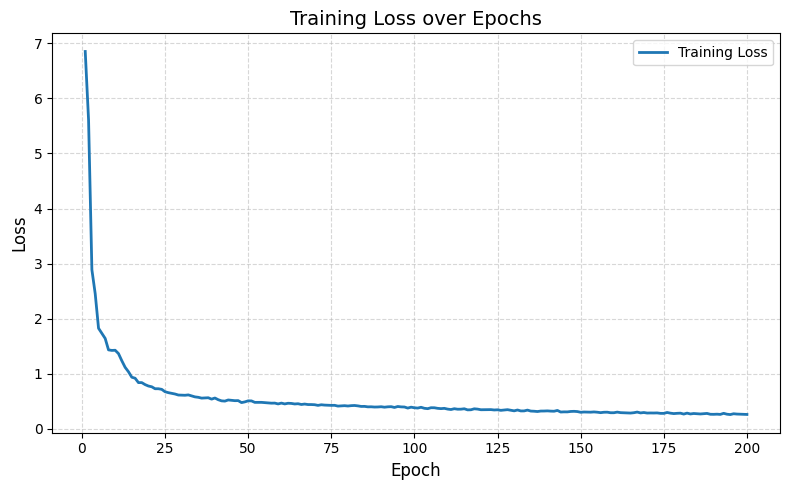

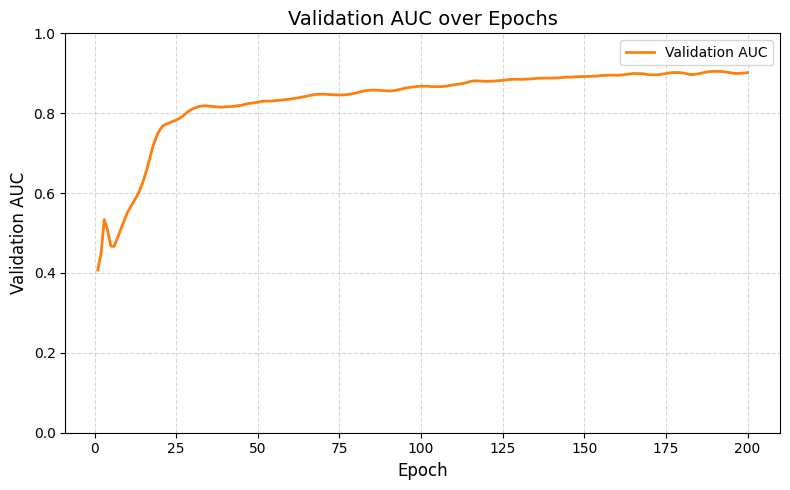


Test AUC: 0.9151 | Test Accuracy: 0.7894 | Test F1: 0.8094 | Test PR AUC: 0.9215
Test Confusion Matrix:
 [[291 134]
 [ 45 380]]


In [142]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_recall_curve, auc, confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create model
# Create model
model = GCNLinkPredictor(
    in_channels=dataset.x.shape[1], 
    hidden_channels=64, 
    num_relations=dataset.num_relations,  # From dataset, not train_data
    num_node_types=len(set(dataset.node_types.values()))  # From dataset
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCEWithLogitsLoss()

# Create node type tensor for your data
def create_node_type_tensor(data):
    """Convert node_types dict to tensor with type IDs"""
    unique_types = list(set(data.node_types.values()))
    type_to_id = {node_type: i for i, node_type in enumerate(unique_types)}
    
    node_type_tensor = torch.zeros(data.num_nodes, dtype=torch.long)
    for node_idx, node_type in data.node_types.items():
        node_type_tensor[node_idx] = type_to_id[node_type]
    
    return node_type_tensor

# Add node type tensors to your data
train_data.node_type_tensor = create_node_type_tensor(train_data)
val_data.node_type_tensor = create_node_type_tensor(val_data)
test_data.node_type_tensor = create_node_type_tensor(test_data)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(
        train_data.x.to(device),
        train_data.edge_index.to(device),
        train_data.edge_type.to(device),
        train_data.edge_label_index.to(device),
        train_data.node_type_tensor.to(device)  # Added node types
    )
    loss = loss_fn(out, train_data.edge_label.to(device))
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test(data):
    model.eval()
    logits = model(
        data.x.to(device),
        data.edge_index.to(device),
        data.edge_type.to(device),
        data.edge_label_index.to(device),
        data.node_type_tensor.to(device)  # Added node types
    )
    probs = torch.sigmoid(logits).cpu().numpy()
    labels = data.edge_label.cpu().numpy()
    auc_score = roc_auc_score(labels, probs)
    preds = (probs > 0.5).astype(int)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    precision, recall, _ = precision_recall_curve(labels, probs)
    pr_auc = auc(recall, precision)
    cm = confusion_matrix(labels, preds)
    return auc_score, acc, f1, pr_auc, cm

# Training loop
epochs = 200
train_losses = []
val_aucs = []

for epoch in range(1, epochs+1):
    loss = train()
    train_losses.append(loss)
    val_auc, val_acc, val_f1, val_pr_auc, val_cm = test(val_data)
    val_aucs.append(val_auc)
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} | Loss: {loss:.4f} | Val AUC: {val_auc:.4f} | Val F1: {val_f1:.4f}")

# Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), train_losses, color='tab:blue', label='Training Loss', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss over Epochs', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Validation AUC
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), val_aucs, color='tab:orange', label='Validation AUC', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation AUC', fontsize=12)
plt.title('Validation AUC over Epochs', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Final evaluation
test_auc, test_acc, test_f1, test_pr_auc, test_cm = test(test_data)
print(f"\nTest AUC: {test_auc:.4f} | Test Accuracy: {test_acc:.4f} | Test F1: {test_f1:.4f} | Test PR AUC: {test_pr_auc:.4f}")
print("Test Confusion Matrix:\n", test_cm)

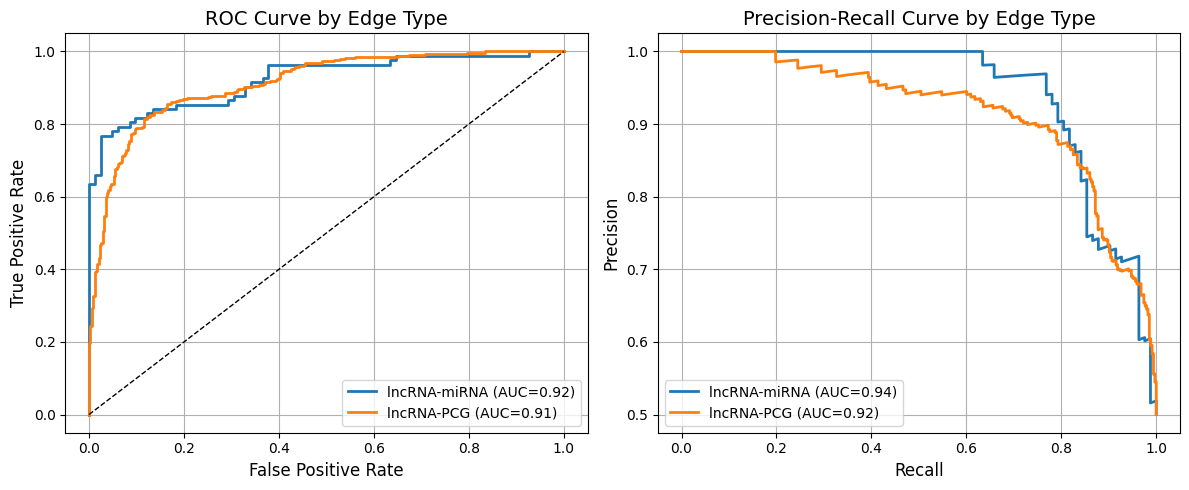

In [143]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Get prediction probabilities and labels
probs = torch.sigmoid(model(
    test_data.x.to(device),
    test_data.edge_index.to(device),
    test_data.edge_type.to(device),
    test_data.edge_label_index.to(device),
    test_data.node_type_tensor.to(device)  # Added node types
)).cpu().detach().numpy()
labels = test_data.edge_label.cpu().numpy()

# Get edge types for each test link (positives first, then negatives)
num_pos = test_data.test_edge_type.shape[0]
edge_types = test_data.test_edge_type.cpu().numpy()  # shape: [num_pos]
relation_map = getattr(test_data, "relation_map", None)
if relation_map is None:
    relation_map = data.relation_map  # Use original data

# Build edge_type array for all test links (positives + negatives)
# For negatives, assign a special type or use the same as positives if you want
all_edge_types = np.concatenate([edge_types, edge_types])  # negatives get same type as positives

plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
for rel_type, rel_id in relation_map.items():
    mask = (all_edge_types == rel_id)
    if np.sum(mask) == 0:
        continue
    fpr, tpr, _ = roc_curve(labels[mask], probs[mask])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{rel_type} (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve by Edge Type", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# PR Curve
plt.subplot(1, 2, 2)
for rel_type, rel_id in relation_map.items():
    mask = (all_edge_types == rel_id)
    if np.sum(mask) == 0:
        continue
    precision, recall, _ = precision_recall_curve(labels[mask], probs[mask])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f"{rel_type} (AUC={pr_auc:.2f})")
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curve by Edge Type", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

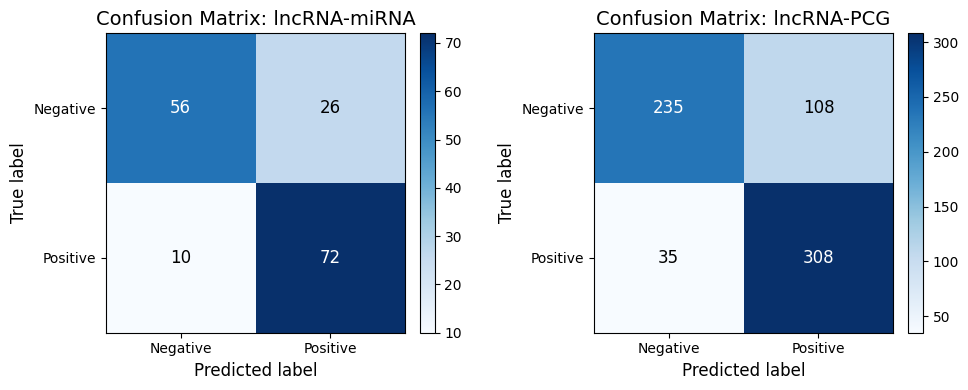

In [144]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions and edge types
preds = (probs > 0.5).astype(int)
labels = test_data.edge_label.cpu().numpy()
num_pos = test_data.test_edge_type.shape[0]
edge_types = test_data.test_edge_type.cpu().numpy()
relation_map = getattr(test_data, "relation_map", None)
if relation_map is None:
    relation_map = dataset.relation_map

# Build edge_type array for all test links (positives + negatives)
all_edge_types = np.concatenate([edge_types, edge_types])  # negatives get same type as positives

# Professional confusion matrices for each edge type
fig, axes = plt.subplots(1, len(relation_map), figsize=(5 * len(relation_map), 4))
if len(relation_map) == 1:
    axes = [axes]

for ax, (rel_type, rel_id) in zip(axes, relation_map.items()):
    mask = (all_edge_types == rel_id)
    cm = confusion_matrix(labels[mask], preds[mask])
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f"Confusion Matrix: {rel_type}", fontsize=14)
    ax.set_xlabel("Predicted label", fontsize=12)
    ax.set_ylabel("True label", fontsize=12)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Negative", "Positive"])
    ax.set_yticklabels(["Negative", "Positive"])
    # Annotate cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, f"{cm[i, j]}", ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black", fontsize=12)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [145]:
## check out data
import pandas as pd

# Get node features and node names
features = dataset.x.numpy()
node_names = [dataset.idx_to_node[idx] for idx in range(dataset.num_nodes)]

# Create DataFrame
features_df = pd.DataFrame(features, index=node_names)
print(features_df.head(20))

                  0         1         2         3         4         5    \
FZD3         0.261812  0.093953 -0.057255  0.034131  0.024302 -0.054460   
STK4        -0.170786 -0.075454 -0.447024  0.366333 -0.439538 -0.097675   
ABI3BP      -0.245029 -0.164734  0.179909  0.126938  0.252694 -0.199264   
DNAJB9       0.055819 -0.047024  0.055096 -0.004162  0.072774 -0.135869   
FGF14-AS2    0.090150  0.127039  0.177529 -0.056952  0.040216  0.145943   
MDR1        -0.021418 -0.157960  0.233208  0.153885  0.227985 -0.217057   
DUSP6       -0.056390  0.037923  0.038753  0.042377  0.010214  0.075742   
FKBP1A      -0.259759 -0.053031  0.139069 -0.085503  0.159400  0.163777   
RALY         0.486289  0.014685 -0.176681 -0.127281  0.078715  0.604327   
PACERR      -0.104942 -0.005586  0.023786  0.028412 -0.128128  0.159344   
SSTR5        0.353531 -0.219582 -0.074473 -0.499446 -0.072074  0.136734   
RPL34-DT     0.077831  0.122885 -0.036304 -0.085571 -0.142842 -0.013592   
SULT1A1      0.252875 -0.

In [4]:

import plotly.graph_objects as go
import plotly.express as px

def visualize_graph_plotly(dataset, width=800, height=600):
    """
    Create an interactive Plotly visualization of the graph
    """
    data = dataset[0]
    
    # Create NetworkX graph
    G = nx.Graph()
    
    # Add nodes with labels
    for idx, node_name in dataset.idx_to_node.items():
        G.add_node(idx, label=node_name)
    
    # Add edges
    edge_index = data.edge_index.numpy()
    edges = [(edge_index[0][i], edge_index[1][i]) for i in range(edge_index.shape[1])]
    G.add_edges_from(edges)
    
    # Generate layout
    pos = nx.spring_layout(G, k=2, iterations=50)
    
    # Determine node types and colors
    node_types = {}
    for _, row in dataset.net_df.iterrows():
        regulator = row['Regulator']
        target = row['Target']
        reg_type = row['RegulatorType']
        target_type = row['TargetType']
        
        if regulator in dataset.node_to_idx:
            node_types[dataset.node_to_idx[regulator]] = reg_type
        if target in dataset.node_to_idx:
            node_types[dataset.node_to_idx[target]] = target_type
    
    # Prepare edge traces
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=1, color='#888'),
        hoverinfo='none',
        mode='lines'
    )
    
    # Prepare node traces by type
    color_map = {'lncRNA': '#1f77b4', 'miRNA': '#ff7f0e', 'mRNA': '#2ca02c'}
    node_traces = []
    
    for node_type, color in color_map.items():
        # Filter nodes by type
        node_indices = [idx for idx, ntype in node_types.items() if ntype == node_type]
        
        if node_indices:
            node_x = [pos[idx][0] for idx in node_indices]
            node_y = [pos[idx][1] for idx in node_indices]
            node_labels = [dataset.idx_to_node[idx] for idx in node_indices]
            
            node_trace = go.Scatter(
                x=node_x, y=node_y,
                mode='markers+text',
                text=node_labels,
                textposition="middle center",
                textfont=dict(size=10, color='white'),
                hoverinfo='text',
                hovertext=[f"{label}<br>Type: {node_type}" for label in node_labels],
                marker=dict(
                    size=20,
                    color=color,
                    line=dict(width=2, color='white')
                ),
                name=node_type
            )
            node_traces.append(node_trace)
    
    # Create figure
    fig = go.Figure(data=[edge_trace] + node_traces,
                   layout=go.Layout(
                        title=dict(
                            text='Interactive Regulatory Network Graph',
                            x=0.5,
                            font=dict(size=16)
                        ),
                        showlegend=True,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Hover over nodes for details. Use mouse to zoom and pan.",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002,
                            xanchor="left", yanchor="bottom",
                            font=dict(color="#888", size=12)
                        )],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        width=width,
                        height=height,
                        plot_bgcolor='white'
                        ))
    
    # Show the plot
    fig.show()
    
    # Print statistics
    print(f"Interactive Graph Created!")
    print(f"Number of nodes: {data.num_nodes}")
    print(f"Number of edges: {data.edge_index.size(1)}")
    print(f"Node types: {list(color_map.keys())}")
    print("Features: Zoom, pan, hover for details, toggle node types in legend")

def print_sample_data(dataset):
    """
    Print sample of the original data and processed tensors
    """
    print("Sample Network Data:")
    print(dataset.net_df.head())
    print("\nSample Label Data:")
    print(dataset.label_df.head())
    
    data = dataset[0]
    print(f"\nProcessed PyG Data Object:")
    print(f"Node features shape: {data.x.shape}")
    print(f"Edge index shape: {data.edge_index.shape}")
    print(f"First few edges (source -> target):")
    edge_index = data.edge_index.numpy()
    for i in range(min(5, edge_index.shape[1])):
        source_name = dataset.idx_to_node[edge_index[0][i]]
        target_name = dataset.idx_to_node[edge_index[1][i]]
        print(f"  {source_name} -> {target_name}")

# Example usage (uncomment when you have the CSV files):
dataset = LinkPredictionDataset('data/net.xlsx', 'data/label.xlsx')
print_sample_data(dataset)
visualize_graph_plotly(dataset)  # Interactive Plotly version

Sample Network Data:
   Unnamed: 0  Regulator      Target RegulatorType TargetType  \
0           1      NEAT1  miR-194-5p        lncRNA      miRNA   
1           2  LINC00460     miR-206        lncRNA      miRNA   
2           3     MALAT1     miR-497        lncRNA      miRNA   
3           4       MIAT     miR-29b        lncRNA      miRNA   
4           5      CASC7     miR-30c        lncRNA      miRNA   

  regulatory_Mechanism  
0      ceRNA or sponge  
1      ceRNA or sponge  
2      ceRNA or sponge  
3      ceRNA or sponge  
4      ceRNA or sponge  

Sample Label Data:
   Unnamed: 0      Regulator  cell.proliferation  cell.invasion  \
0           1  1700020I14Rik                   0              0   
1           2            7SK                   1              0   
2           3            91H                   0              1   
3           4        A2M-AS1                   1              1   
4           5          AATBC                   1              0   

   cell.migrati

NameError: name 'nx' is not defined

In [ ]:
# Print a few node names from your graph and from node2vec
print("First 5 graph node names:", [dataset.idx_to_node[idx] for idx in range(5)])
node2vec_df = pd.read_csv("/Users/marinamomina/Desktop/studium/master/1_Sem/ML4RG/LincGNN/NodePre/lncRNA_emb_features.csv", index_col=0)
print("First 5 node2vec index names:", list(node2vec_df.index[:5]))

First 5 graph node names: ['RP11-543N12.1', 'RP11-789C1.1', 'ATM', 'RAB10', 'SLCO4A1']
First 5 node2vec index names: ['NEAT1', 'LINC00460', 'MALAT1', 'MIAT', 'CDKN2B-AS1']
